In [1]:
import numpy as np
import time as tm

# `for` and `while` loops

The `python` language offers many options for tweaking `for` and `while` loops so that we can write almost any loop as either of them.

However, we recommend instead to not use those tricks, and always try to use each construction for the task it was built:

 - `for` loops are used to run over an _iterable_. In almost every example in this course, that iterable will be a `range` object, a list, or an array, and we will know its size right from the beginning.
 - we will only use `while` loops for coding iterative methods, in which some code is run over and over, until some "stop criterion" is satified.

### Example

Add the squares of the elements of an array.
 - Run over the array, which is an iterable.
 - We know the size of the array.
 - => a `for` loop is most appropriate.

In [2]:
myarray = np.arange(20)-7
N = len(myarray)


In [3]:
mysum = 0
for x in myarray:
    mysum += x**2
mysum

790

In [4]:
# variant: we run over the array indices instead of running over the array values
# The previous option is usually best, but sometimes this is necessary :-/
myarray = np.arange(20)-7
mysum = 0
for i in range(N):
    mysum += myarray[i]**2
mysum

790

In [5]:
# variant: list comprehension, a shorter syntax, often easier to understand,
#          roughly equivalent to the others in terms of performance
mysum = sum(x**2 for x in myarray)
mysum

790

In [6]:
## INAPPROPRIATE, A WHILE LOOP
i = 0
mysum = 0
while i<N:
    mysum += myarray[i]**2
    i += 1
mysum

790

### When in doubt, the `for` loop is usually a better solution.
 - It's only too easy to write an infinite `while` loop
 - If you didn't write it, a `while` loop is harder to understand

## When to use a `while` loop?

There are many legitimate use cases for `while` loops, but in this course there is only one:

 - An _iterative method_ that repeats some computations until some "stop criterion" is satisfied.

### Example

The babilonian method for computing square roots:

 - GOAL: Compute the square root of `a`
 - INITIALIZATION: Our initial approximation is not good, for instance `x=1`, `x=a`.
 - REPEAT: If `x` is an approximation, then `(1/2)*x + (1/2)*(a/x)` is a better approximation
 - UNTIL: Stop when the difference between `x**2` and `a` is smaller than our __tolerance__ `epsilon`.

In [7]:
# GOAL
a = 2
# INITIALIZATION
x = a
# TOLERANCE
epsilon = 1e-6
# while the STOP CRITERION is not satisfied
while abs(x**2-a)>epsilon:
    # REPEAT
    x = (1/2)*x + (1/2)*(a/x)

# The final error is smaller than the tolerance
print(x, x**2, abs(x**2-a))

1.4142135623746899 2.0000000000045106 4.510614104447086e-12


we pack it as a function for computing square roots:

In [8]:
def root(a, # GOAL: sqrt(a)
         epsilon = 1e-6 # TOLERANCE
        ):
    # INITIALIZATION
    x = a
    # while the STOP CRITERION is not satisfied
    while abs(x**2-a)>epsilon:
        # REPEAT
        x = (1/2)*x + (1/2)*(a/x)
    return x

# The final error is smaller than the tolerance
print(root(2), root(4))

1.4142135623746899 2.0000000929222947


#### Exercise: find the number `x*` such that `f(x*) = x*`

Define $f(x) = e^{-x}$.
Observing the graphs of f(x) and the identity function `x->x` in the interval $[0,1]$, it is clear that there is a number $0<x^*<1$ such that `f(x*) = x*`.

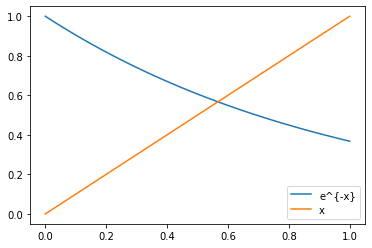

In [9]:
# We will learn soon the code for generating graphics
#  this is also in the python cheatsheet, it's the most basic kind of graph
import matplotlib.pyplot as plt
xs = np.linspace(0,1,100)
ys = np.exp(-xs)
plt.plot(xs, ys, label='e^{-x}')
plt.plot(xs, xs, label='x')
plt.legend()

In order to compute this point x*, we will use the "fixed point method" (which does not always work, as we will see...):

 - GOAL: Compute x* such that x* = exp(-x*)
 - IDEA: If we apply f many times, we get `x*=f(f(f(... x...)))`, which looks like `f(x*)=f(f(f(f(... x...))))`.
 - INITIALIZATION: Our initial approximation can be any number in the [0,1] interval.
 - REPEAT: If x is an approximation, then `f(x)=exp(-x)` is a better approximation.
 - UNTIL: Stop when the difference between `x` and `exp(-x)` is smaller than our tolerance epsilon.


In [10]:
def f(x):
    return np.exp(-x)

def solution(
    f, # GOAL
    x0 = 1, #INITIALIZATION
    epsilon = 1e-6 # TOLERANCE,
        ):
    # INITIALIZATION
    x = x0
    # WRITE YOUR CODE HERE, INCLUDING THE STOP CRITERION AND THE ITERATION TO BE REPEATED
    
    return x

# The final error must be smaller than the tolerance
x_ast = solution(f)
print('x*=',x_ast, '; error=', f(x_ast) - x_ast)

x*= 1 ; error= -0.6321205588285577


## Run over an iterable, but we can stop before we reach the end: for ... break/return

In some cases, _we have an iterable_, we may even know its length, but the loop may stop prematurely, so that _we don't know how many times the loop will be repeated_. In this case it is convenient to use a `for` loop, whose syntax is more clear, but use the `break` keyword if we want to exit the loop before it reaches the end of the iterable. A `return` instruction can also work if we are inside a function which has already found the desired result.

### Example: decide if a number is prime

We will decide if a number `n` is primer with the most naive technique: we will attempt to divide it by all the smaller numbers.

Our first version is a `for` loop without `break`:

In [11]:
n = 1721492

In [12]:
# We use the boolean `is_prime` that starts as `True`, but we will pass all the divisibility test
#  by smaller numbers. If it passes all such tests, `is_prime` will remain `True`.
#  If one or more of those tests fail, `is_prime` will switch to `False`.
is_prime = True
for i in range(2,n):
    # if i divides n
    if n%i==0:
        is_prime = False
print(n, 'is prime' if is_prime else 'is composite')

1721492 is composite


Same idea, but a `while` loop:

In [13]:
is_prime = True
i = 2
while i<n:
    # if i divides n
    if n%i==0:
        is_prime = False
    i += 1
print(n, 'is prime' if is_prime else 'is composite')

1721492 is composite


This `while` loop is more efficient. As soon as we find a divisor, we step out of the loop. We are not interested in the whole list of divisors, we just want to know if it is prime...

In [14]:
i = 2
while (i<n) and (n%i==0):
    i += 1
if i==n:
    is_prime = True
else:
    is_prime = False
print(n, 'is prime' if is_prime else 'is composite')

1721492 is composite


Comparamos la velocidad

In [15]:
before = tm.time()
# Tu código aquí
is_prime = True
i = 2
while i<n:
    # if i divides n
    if n%i==0:
        is_prime = False
    i += 1

after = tm.time()
print('versión lenta: ', after - before)


versión lenta:  0.23559045791625977


In [16]:
before = tm.time()
# Tu código aquí
i = 2
while (i<n) and (n%i==0):
    i += 1
if i==n:
    is_prime = True
else:
    is_prime = False
print(n, 'is prime' if is_prime else 'is composite')

after = tm.time()
print('versión alternativa: ', after - before)


1721492 is composite
versión alternativa:  0.0017707347869873047


### Exercise

 - Achieve the same result with a `for` loop and a `break` keyword.

### Exercise

 - Write code to compute the factorial of a number `n` using a loop.